In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\EXL_EQ_2023_Dataset.csv")

In [2]:
print("Dataset shape:", df.shape)

Dataset shape: (223584, 45)


In [3]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 PM2.5                                                 5540
NO                                                    4849
NO2                                                   5340
NOx                                                   5972
NH3                                                   5636
SO2                                                   3884
CO                                                    3822
Ozone                                                 4430
Benzene                                               6097
Toluene                                              56554
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                     

In [4]:
print("Data types:\n", df.dtypes)

Data types:
 PM2.5                                               float64
NO                                                  float64
NO2                                                 float64
NOx                                                 float64
NH3                                                 float64
SO2                                                 float64
CO                                                  float64
Ozone                                               float64
Benzene                                             float64
Toluene                                             float64
Temp                                                float64
RH                                                  float64
WS                                                  float64
WD                                                  float64
SR                                                  float64
BP                                                  float64
AT                         

In [5]:
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
                PM2.5             NO            NO2            NOx  \
count  218044.000000  218735.000000  218244.000000  217612.000000   
mean       69.213957      14.072135      30.366790      30.736544   
std        56.962718      22.097622      31.883841      31.688403   
min         0.100000       0.010000       0.010000       0.000000   
25%        30.340937       4.006669      12.175122      13.329495   
50%        51.630955       6.727626      19.174929      21.085326   
75%        91.310000      13.334686      36.976778      35.779768   
max       890.873920     359.241357     300.479696     394.141771   

                 NH3            SO2             CO          Ozone  \
count  217948.000000  219700.000000  219762.000000  219154.000000   
mean       26.234892      13.945535       0.987377      31.138962   
std        20.545715      10.851849       0.792493      21.908442   
min         0.100000       0.010000       0.000000       0.030000   
25%     

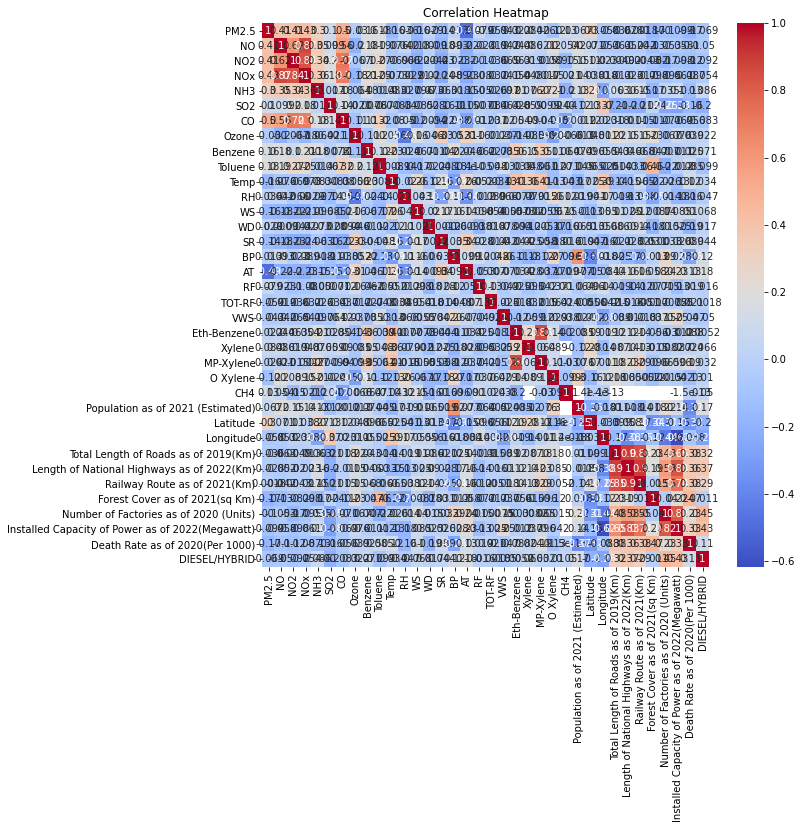

In [6]:
# Check the correlation between the features
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

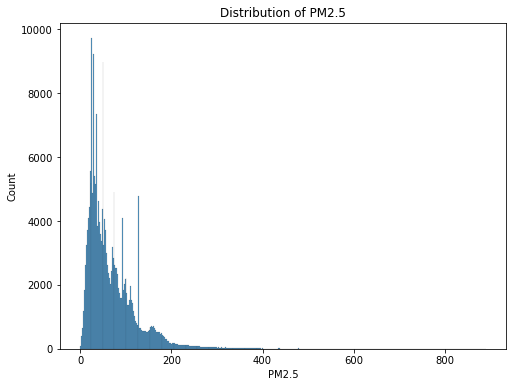

In [7]:
# Check the distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df['PM2.5'])
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.show()

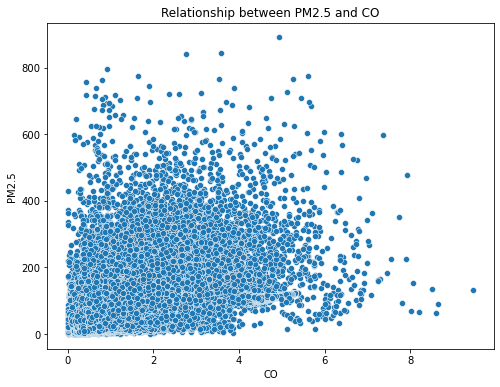

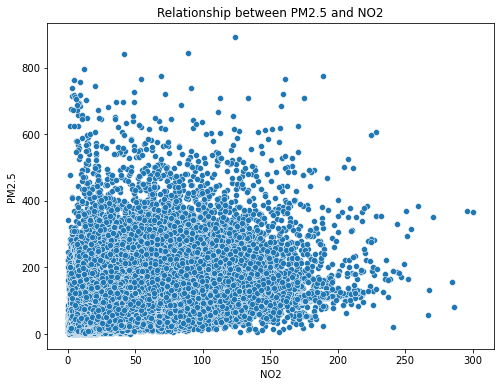

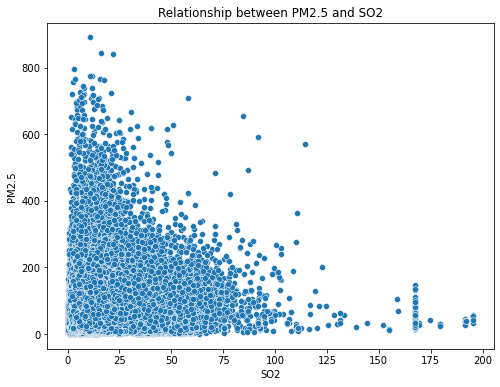

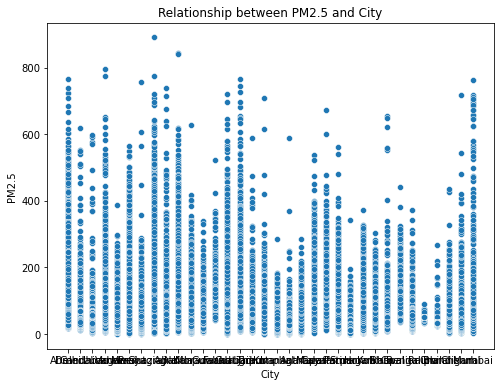

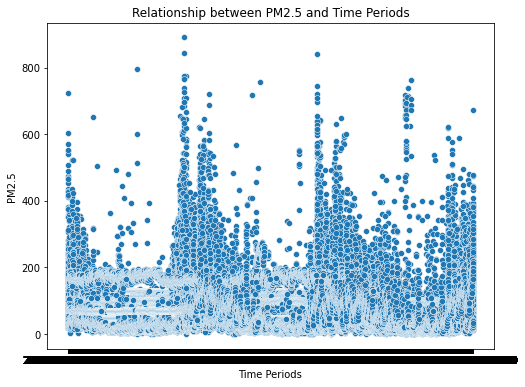

In [8]:
# Check the relationship between the target variable and the numerical features
numerical_features = [  'CO', 'NO2',  'SO2', 'City', 'Time Periods']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[feature], y=df['PM2.5'])
    plt.title("Relationship between PM2.5 and " + feature)
    plt.xlabel(feature)
    plt.ylabel("PM2.5")
    plt.show()

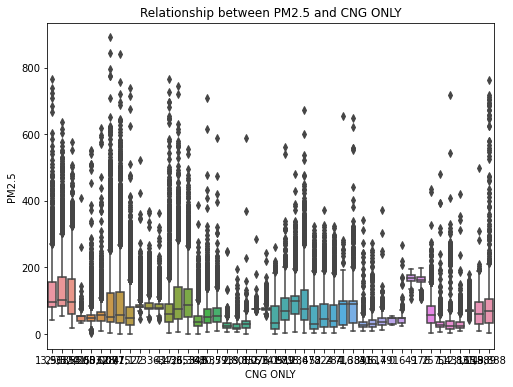

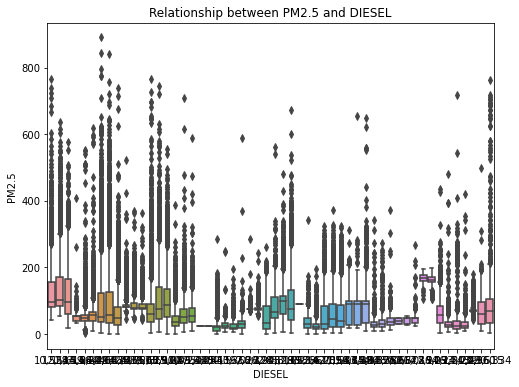

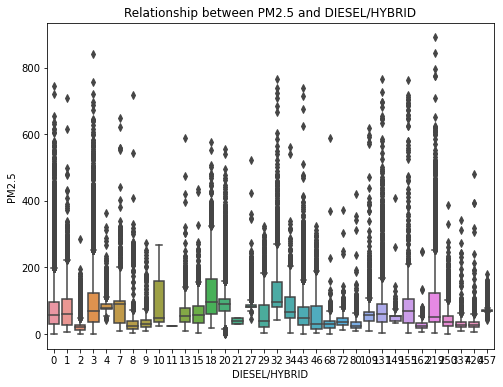

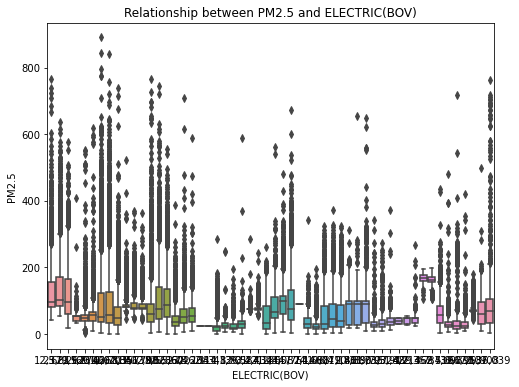

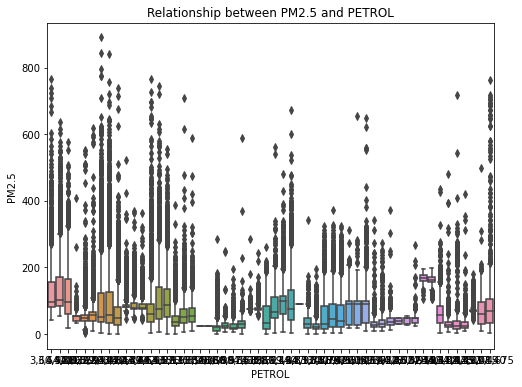

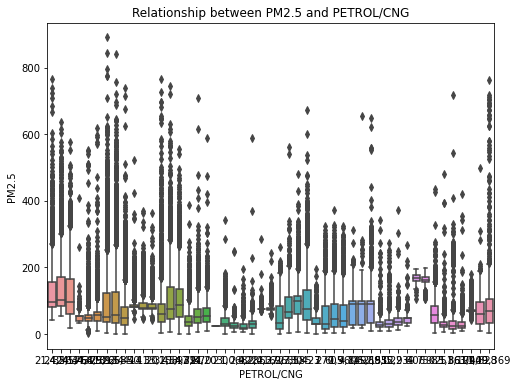

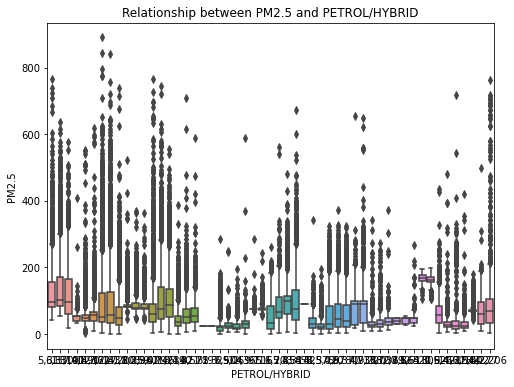

In [9]:
# Check the relationship between the target variable and the categorical features
categorical_features = ['CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG', 'PETROL/HYBRID']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[feature], y=df['PM2.5'])
    plt.title("Relationship between PM2.5 and " + feature)
    plt.xlabel(feature)
    plt.ylabel("PM2.5")
    plt.show()

In [10]:
# Remove unnecessary columns
df.drop(['State', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Encode categorical columns
le1 = LabelEncoder()
le2 = LabelEncoder()

df['City'] = le1.fit_transform(df['City'])
df['Time Periods'] = le2.fit_transform(df['Time Periods'])

df = pd.get_dummies(df, columns=['CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG', 'PETROL/HYBRID'])


In [11]:
# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
# Split data into training and testing sets
X = df.drop(['PM2.5'], axis=1)
y = df['PM2.5']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Perform feature selection using Lasso regularization
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

In [15]:
# Train a linear regression model on the selected features
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)
y_pred = lr_model.predict(X_test_selected)

In [16]:
# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.5423632809708483
MSE: 1472.108406762583


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train a decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)
param_grid = {'max_depth': [10, 20, 30, 50]}
dt_grid = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50]})

In [18]:

# Make predictions on test data
dt_y_pred = dt_grid.predict(X_test)

X_new = df.drop(['PM2.5'], axis=1)
dt_y_new = dt_grid.predict(X_new)

In [19]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test,dt_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_y_pred)


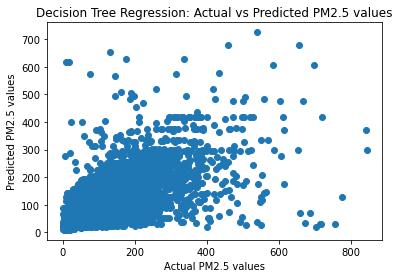

In [20]:
# Create a scatter plot of actual vs predicted values in test set
plt.scatter(y_test, dt_y_pred)
plt.xlabel('Actual PM2.5 values')
plt.ylabel('Predicted PM2.5 values')
plt.title('Decision Tree Regression: Actual vs Predicted PM2.5 values')
plt.show()

In [21]:
# Make predictions for the next 3 days with 4-hour intervals
predictions = []
id=1
for city in df['City'].unique():
    for time in range(0, 72, 4):
        prediction = dt_grid.predict(X_new[(X_new['City'] == city) & (X_new['Time Periods'] == time)])
        predictions.append([id,city, time, prediction[0]])
        id=id+1

# Convert predictions list to a pandas dataframe
predictions_df = pd.DataFrame(predictions, columns=['ID','City', 'Time Periods', 'PM2.5_Prediction'])

predictions_df['City'] = le1.inverse_transform((predictions_df['City']).astype(int))
predictions_df['Time Periods'] = le2.inverse_transform((predictions_df['Time Periods']).astype(int))
# Save predictions to a CSV file
predictions_df.to_excel('PM2.5_Predictions.xlsx', index=False)